In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

warnings.filterwarnings('ignore')


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


X_train = train_images.reshape((train_images.shape[0], 28 * 28)).astype('float32') / 255
X_test = test_images.reshape((test_images.shape[0], 28 * 28)).astype('float32') / 255
y_train = train_labels
y_test = test_labels

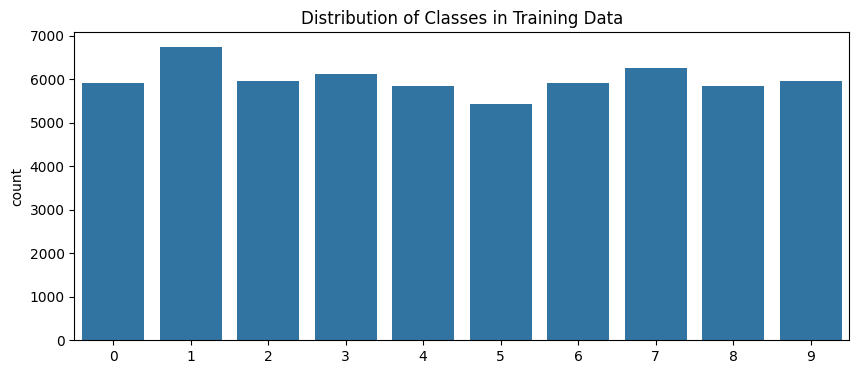

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x=y_train)
plt.title("Distribution of Classes in Training Data")
plt.show()


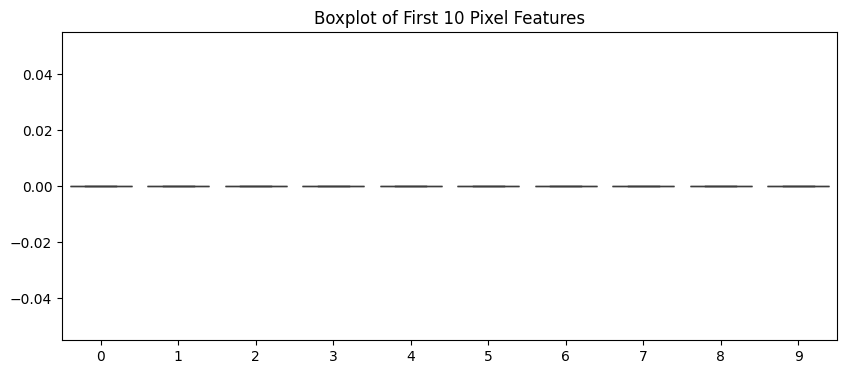

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=X_train[:, :10])
plt.title("Boxplot of First 10 Pixel Features")
plt.show()


In [ ]:
X_train = X_train[:10000]
y_train = y_train[:10000]


Random Forest (n=10) Accuracy: 0.9067, AUC-ROC: 0.9890


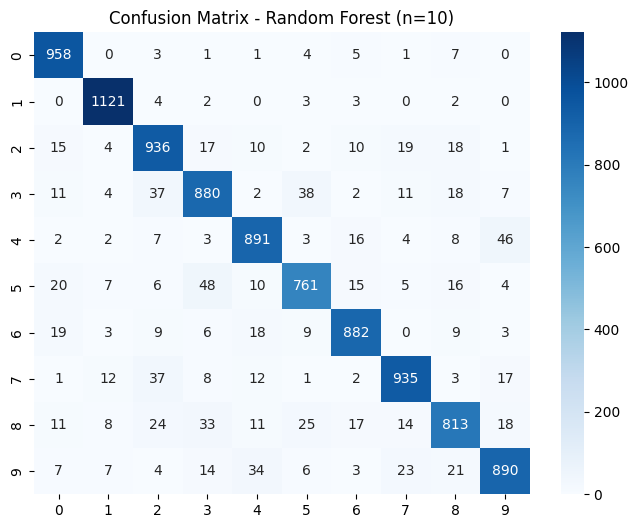

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.96      0.99      0.97      1135
           2       0.88      0.91      0.89      1032
           3       0.87      0.87      0.87      1010
           4       0.90      0.91      0.90       982
           5       0.89      0.85      0.87       892
           6       0.92      0.92      0.92       958
           7       0.92      0.91      0.92      1028
           8       0.89      0.83      0.86       974
           9       0.90      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



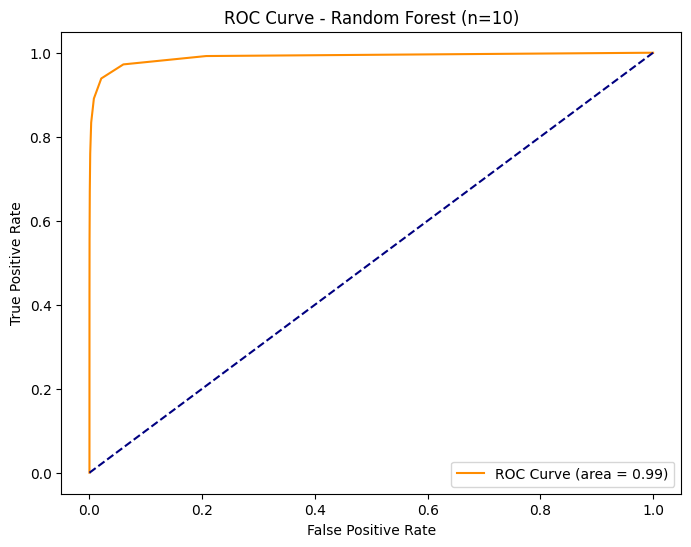

Random Forest (n=50) Accuracy: 0.9464, AUC-ROC: 0.9968


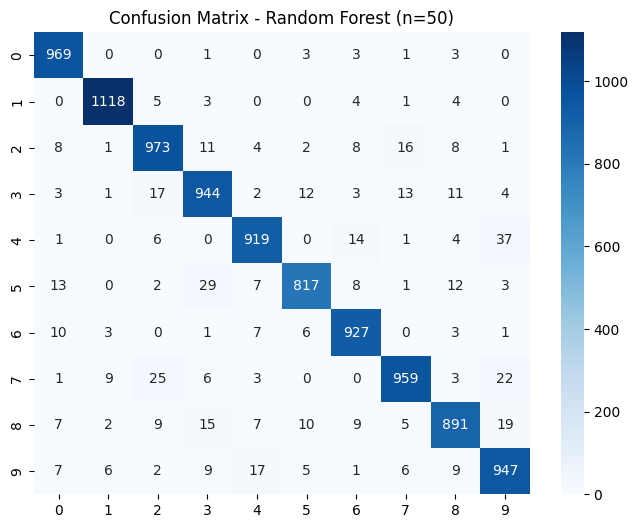

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.93      0.93      0.93      1010
           4       0.95      0.94      0.94       982
           5       0.96      0.92      0.94       892
           6       0.95      0.97      0.96       958
           7       0.96      0.93      0.94      1028
           8       0.94      0.91      0.93       974
           9       0.92      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



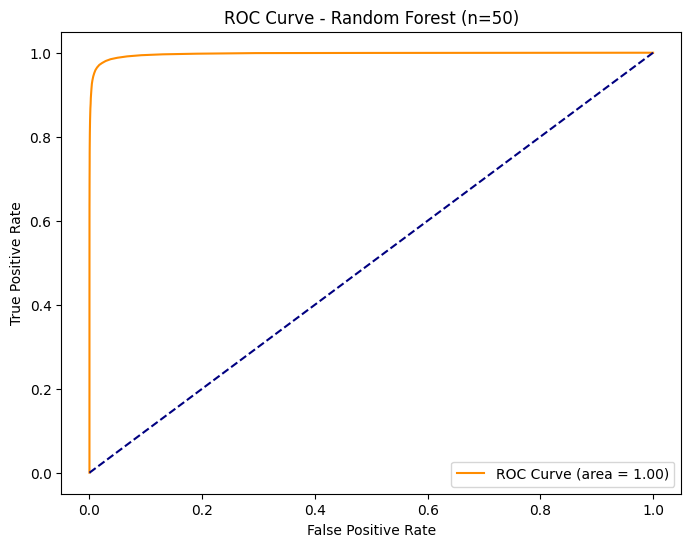

Random Forest (n=100) Accuracy: 0.9503, AUC-ROC: 0.9974


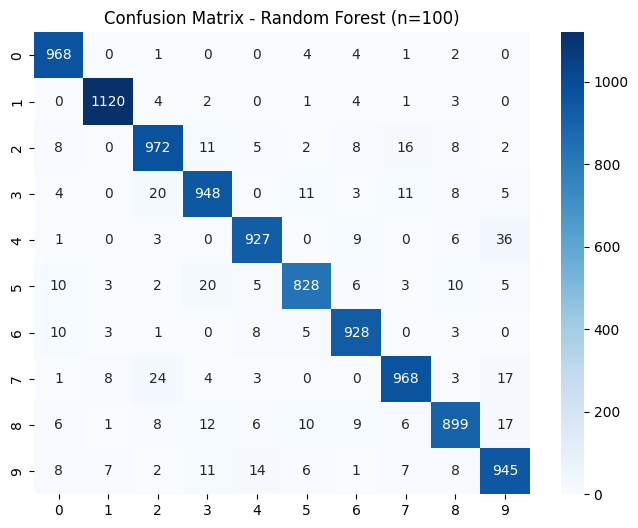

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.94      0.94      0.94      1010
           4       0.96      0.94      0.95       982
           5       0.96      0.93      0.94       892
           6       0.95      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.95      0.92      0.93       974
           9       0.92      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



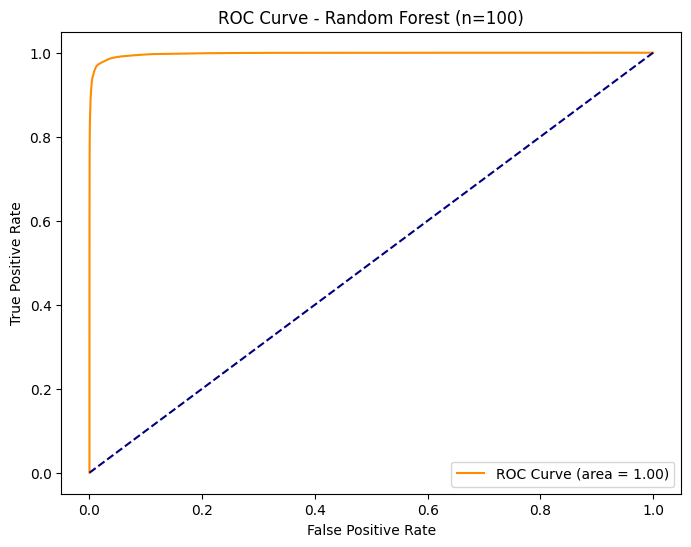

In [ ]:
# ========== BAGGING: Random Forest ==========
n_estimators_list = [10, 50, 100]
rf_results = []
for n_est in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n_est, max_features='sqrt', n_jobs=-1, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    roc_auc_val = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)),
                                rf_model.predict_proba(X_test),
                                average='macro', multi_class='ovr')

    print(f"Random Forest (n={n_est}) Accuracy: {acc:.4f}, AUC-ROC: {roc_auc_val:.4f}")

    # Confusion Matrix
    rf_cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.title(f"Confusion Matrix - Random Forest (n={n_est})")
    plt.show()

    # Classification Report
    print("Classification Report - Random Forest:")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=np.unique(y_test)).ravel(),
                            rf_model.predict_proba(X_test).ravel())
    roc_auc_curve = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc_curve:.2f})", color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Random Forest (n={n_est})")
    plt.legend()
    plt.show()

    rf_results.append((n_est, acc, roc_auc_val, rf_model))

best_rf = max(rf_results, key=lambda x: x[1])

AdaBoost Accuracy: 0.6510, AUC-ROC: 0.9322


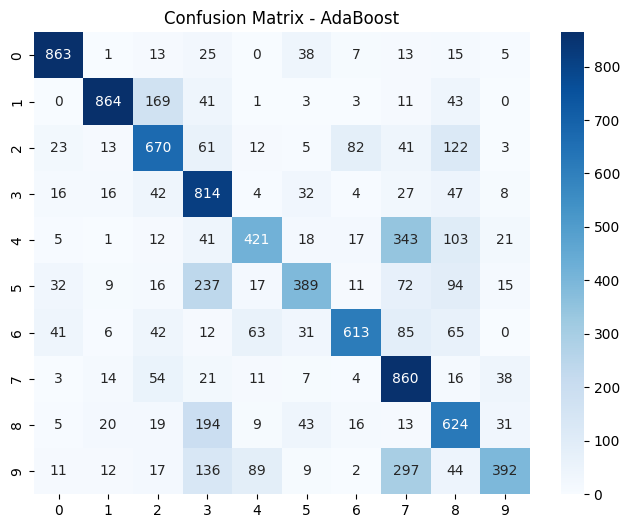

Classification Report - AdaBoost:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       980
           1       0.90      0.76      0.83      1135
           2       0.64      0.65      0.64      1032
           3       0.51      0.81      0.63      1010
           4       0.67      0.43      0.52       982
           5       0.68      0.44      0.53       892
           6       0.81      0.64      0.71       958
           7       0.49      0.84      0.62      1028
           8       0.53      0.64      0.58       974
           9       0.76      0.39      0.52      1009

    accuracy                           0.65     10000
   macro avg       0.69      0.65      0.64     10000
weighted avg       0.69      0.65      0.65     10000



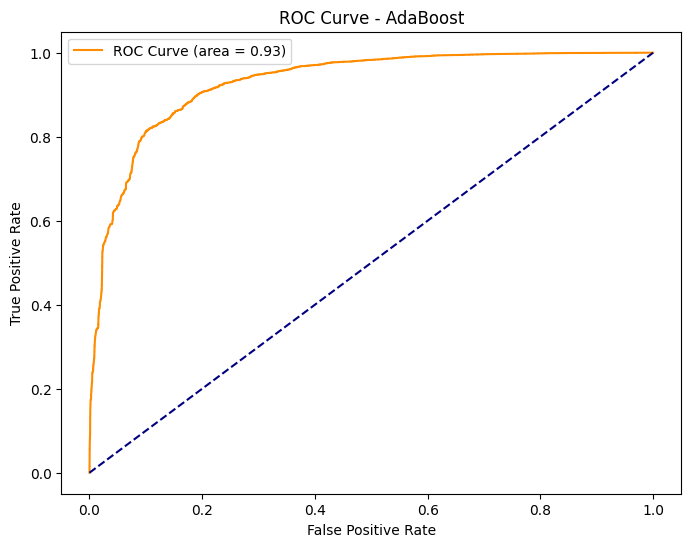

In [73]:
# ========== BOOSTING: AdaBoost ==========
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

ada_accuracy = accuracy_score(y_test, ada_pred)
ada_auc_val = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), ada_model.predict_proba(X_test),
                            average='macro', multi_class='ovr')
print(f"AdaBoost Accuracy: {ada_accuracy:.4f}, AUC-ROC: {ada_auc_val:.4f}")

# Confusion Matrix - AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, ada_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - AdaBoost")
plt.show()

# Classification Report
print("Classification Report - AdaBoost:")
print(classification_report(y_test, ada_pred))

# ROC Curve - AdaBoost
fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=np.unique(y_test)).ravel(),
                        ada_model.predict_proba(X_test).ravel())
roc_auc_curve = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc_curve:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.title("ROC Curve - AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Gradient Boosting Accuracy: 0.9079, AUC-ROC: 0.9937


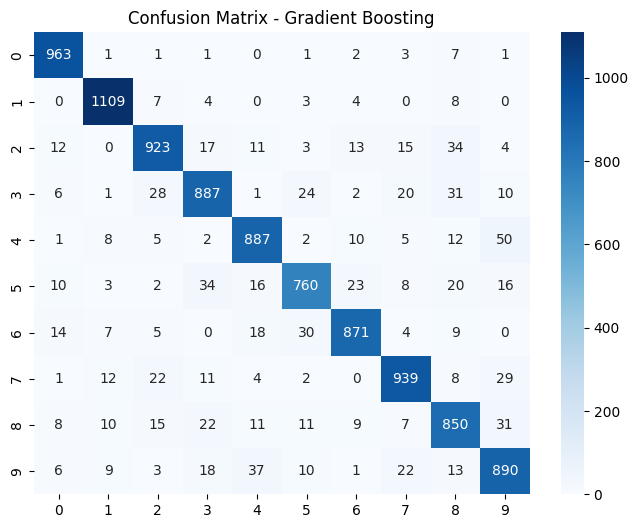

Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.91      0.89      0.90      1032
           3       0.89      0.88      0.88      1010
           4       0.90      0.90      0.90       982
           5       0.90      0.85      0.87       892
           6       0.93      0.91      0.92       958
           7       0.92      0.91      0.92      1028
           8       0.86      0.87      0.86       974
           9       0.86      0.88      0.87      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



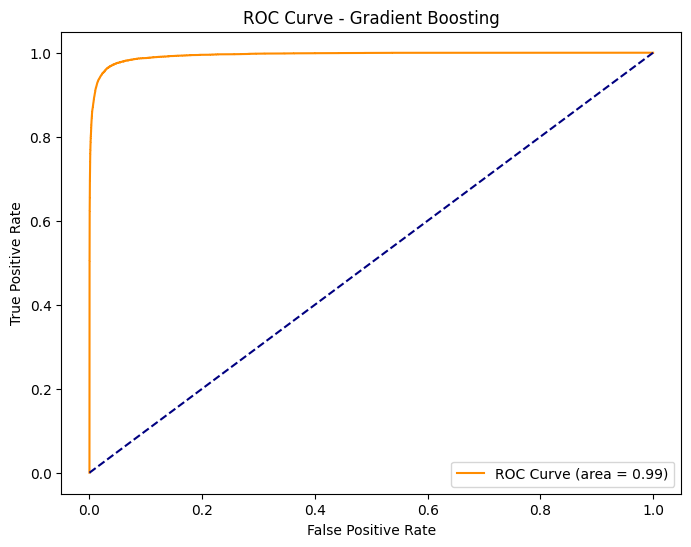

In [74]:
# ========== BOOSTING: Gradient Boosting ==========
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_auc_val = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), gb_model.predict_proba(X_test),
                           average='macro', multi_class='ovr')
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}, AUC-ROC: {gb_auc_val:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

print("Classification Report - Gradient Boosting:")
print(classification_report(y_test, gb_pred))

fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=np.unique(y_test)).ravel(),
                        gb_model.predict_proba(X_test).ravel())
roc_auc_curve = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc_curve:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.title("ROC Curve - Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Stacking Accuracy: 0.9575, AUC-ROC: 0.9980


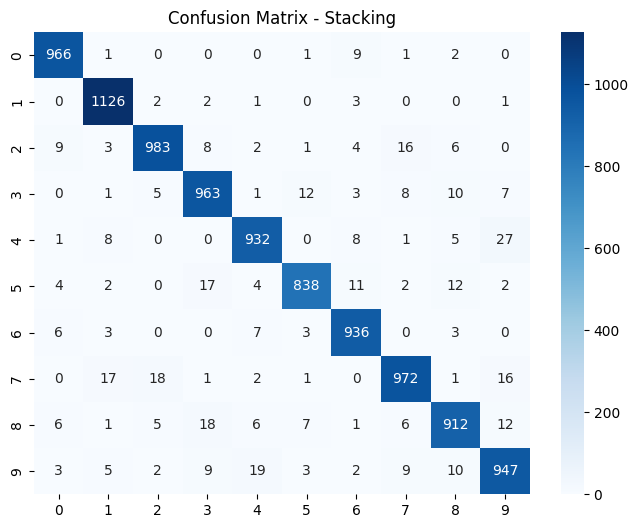

Classification Report - Stacking:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      0.99      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.95      0.95      0.95      1010
           4       0.96      0.95      0.95       982
           5       0.97      0.94      0.95       892
           6       0.96      0.98      0.97       958
           7       0.96      0.95      0.95      1028
           8       0.95      0.94      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



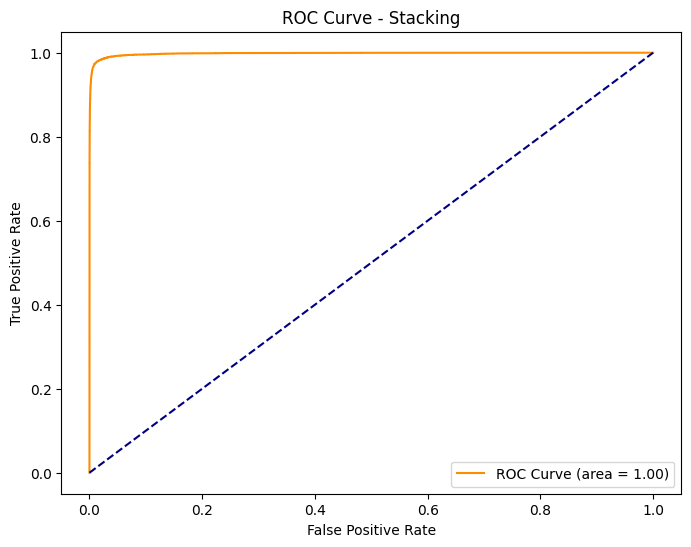

In [75]:
# ========== STACKING ==========
X_train_base, X_val, y_train_base, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42))
]

meta_features_val = np.zeros((X_val.shape[0], len(base_models), 10))
meta_features_test = np.zeros((X_test.shape[0], len(base_models), 10))

for i, (name, model) in enumerate(base_models):
    model.fit(X_train_base, y_train_base)
    meta_features_val[:, i, :] = model.predict_proba(X_val)
    meta_features_test[:, i, :] = model.predict_proba(X_test)

meta_features_val = meta_features_val.reshape(X_val.shape[0], -1)
meta_features_test = meta_features_test.reshape(X_test.shape[0], -1)

meta_model = LogisticRegression(max_iter=1000, random_state=42)
meta_model.fit(meta_features_val, y_val)
stack_pred = meta_model.predict(meta_features_test)

stack_accuracy = accuracy_score(y_test, stack_pred)
stack_auc_val = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), meta_model.predict_proba(meta_features_test),
                              average='macro', multi_class='ovr')
print(f"Stacking Accuracy: {stack_accuracy:.4f}, AUC-ROC: {stack_auc_val:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, stack_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Stacking")
plt.show()

print("Classification Report - Stacking:")
print(classification_report(y_test, stack_pred))

fpr, tpr, _ = roc_curve(label_binarize(y_test, classes=np.unique(y_test)).ravel(),
                        meta_model.predict_proba(meta_features_test).ravel())
roc_auc_curve = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc_curve:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.title("ROC Curve - Stacking")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


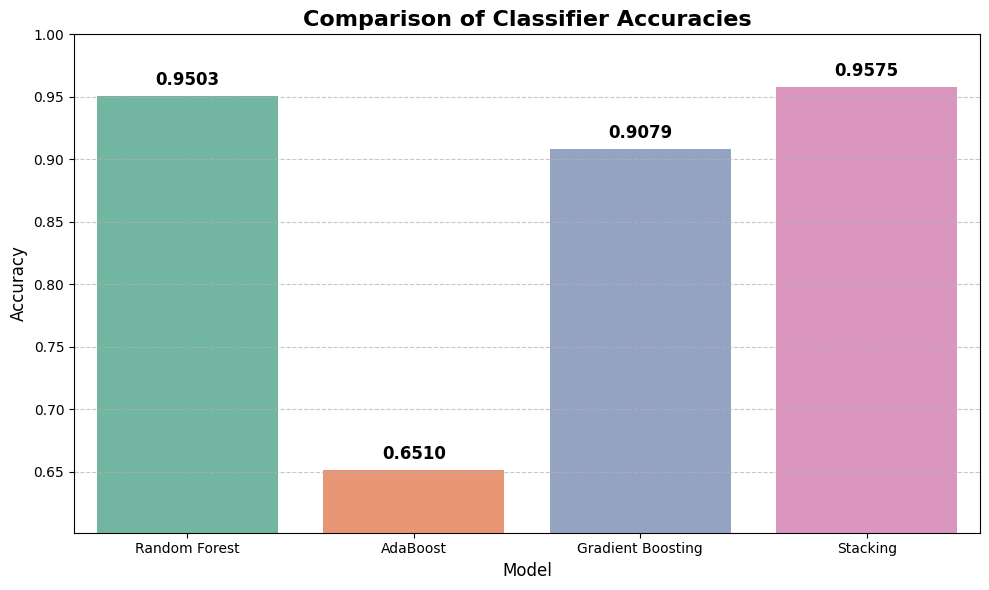

In [ ]:
# ========== FINAL COMPARISON ==========
methods = ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'Stacking']
accuracies = [best_rf[1], ada_accuracy, gb_accuracy, stack_accuracy]

plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set2")

bars = sns.barplot(x=methods, y=accuracies, palette=colors)

for bar, acc in zip(bars.patches, accuracies):
    height = bar.get_height()
    bars.annotate(f'{acc:.4f}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(min(accuracies) - 0.05, 1.0)
plt.title("Comparison of Classifier Accuracies", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


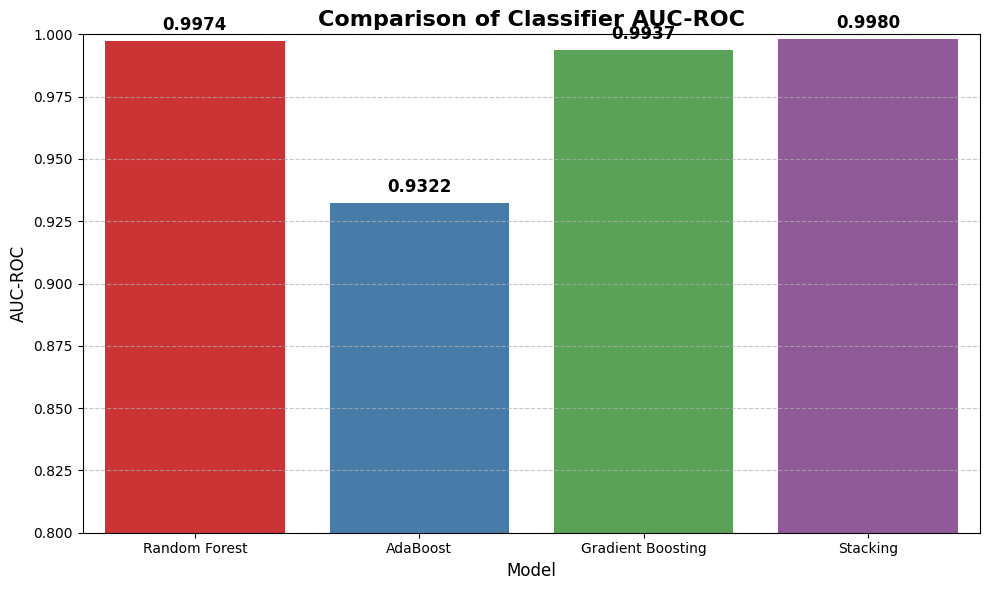

In [ ]:
# ========== FINAL COMPARISON: AUC-ROC ==========
methods_auc = ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'Stacking']
aucs = [best_rf[2], ada_auc_val, gb_auc_val, stack_auc_val]

plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set1")

bars_auc = sns.barplot(x=methods_auc, y=aucs, palette=colors)

for bar, auc_val in zip(bars_auc.patches, aucs):
    height = bar.get_height()
    bars_auc.annotate(f'{auc_val:.4f}',
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 5),
                      textcoords="offset points",
                      ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0.8, 1.0)
plt.title("Comparison of Classifier AUC-ROC", fontsize=16, fontweight='bold')
plt.ylabel("AUC-ROC", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [80]:
summary_df = pd.DataFrame({
    'Model': methods,
    'Accuracy': accuracies,
    'AUC-ROC': aucs
})

print("\nFinal Summary Comparison:")
print(summary_df.sort_values(by='Accuracy', ascending=False))



Final Summary Comparison:
               Model  Accuracy   AUC-ROC
3           Stacking    0.9575  0.998033
0      Random Forest    0.9503  0.997429
2  Gradient Boosting    0.9079  0.993700
1           AdaBoost    0.6510  0.932203


In [81]:
best_method_idx = np.argmax(accuracies)
print(f"\nBest performing method: {methods[best_method_idx]} with accuracy {accuracies[best_method_idx]:.4f}")


Best performing method: Stacking with accuracy 0.9575
